<a href="https://colab.research.google.com/github/TristanDelgado/Intro-To-Machine-Learning/blob/main/Homework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Machine Learning CS-4410-XTIA Homework 2
Problem 15.15 - LINEAR REGRESSION WITH THE DIABETES DATASET

##Instructions

Investigate the Diabetes dataset bundled with scikit-learn

https://scikit-learn.org/stable/datasets/index.html#diabetes-dataset


The dataset contains 442 samples, each with 10 features and a label indicating the “disease progression one year after baseline.” Using this dataset, reimplement the steps of this chapter’s multiple linear regression case study in Section 15.5.

##Solution

###Loading the Dataset

In [ ]:
#Importing libraries and data
%matplotlib inline
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

In [4]:
#Printing the a description of the code
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [5]:
#Looking at the data array's shape
diabetes.data.shape

(442, 10)

In [6]:
#Looking at the target array's shape
diabetes.target.shape

(442,)

In [7]:
#Feature Names
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

###Exploring the Data with Pandas

In [11]:
#Importing Pandas
import pandas as pd
pd.set_option('display.precision', 4)
pd.set_option("display.max_columns", 9)
pd.set_option("display.width", None)

In [21]:
#Creating a DataFrame from the data
diabetes_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
diabetes_df["Disease Proggression"] = pd.Series(diabetes.target)

In [22]:
#Peeking at the diabetes data
diabetes_df.head()

,age,sex,bmi,bp,...,s4,s5,s6,Disease Proggression
0,0.0381,0.0507,0.0617,0.0219,...,-0.0026,0.0199,-0.0176,151.0
1,-0.0019,-0.0446,-0.0515,-0.0263,...,-0.0395,-0.0683,-0.0922,75.0
2,0.0853,0.0507,0.0445,-0.0057,...,-0.0026,0.0029,-0.0259,141.0
3,-0.0891,-0.0446,-0.0116,-0.0367,...,0.0343,0.0227,-0.0094,206.0
4,0.0054,-0.0446,-0.0364,0.0219,...,-0.0026,-0.0320,-0.0466,135.0


In [23]:
#Getting the DataFrames summary stats
diabetes_df.describe()

,age,sex,bmi,bp,...,s4,s5,s6,Disease Proggression
count,4.4200e+02,4.4200e+02,4.4200e+02,4.4200e+02,...,4.4200e+02,4.4200e+02,4.4200e+02,442.0000
mean,-2.5118e-19,1.2308e-17,-2.2456e-16,-4.7976e-17,...,-9.0425e-18,9.2937e-17,1.1303e-17,152.1335
std,4.7619e-02,4.7619e-02,4.7619e-02,4.7619e-02,...,4.7619e-02,4.7619e-02,4.7619e-02,77.0930
min,-1.0723e-01,-4.4642e-02,-9.0275e-02,-1.1240e-01,...,-7.6395e-02,-1.2610e-01,-1.3777e-01,25.0000
25%,-3.7299e-02,-4.4642e-02,-3.4229e-02,-3.6656e-02,...,-3.9493e-02,-3.3246e-02,-3.3179e-02,87.0000
50%,5.3831e-03,-4.4642e-02,-7.2838e-03,-5.6704e-03,...,-2.5923e-03,-1.9472e-03,-1.0777e-03,140.5000
75%,3.8076e-02,5.0680e-02,3.1248e-02,3.5644e-02,...,3.4309e-02,3.2432e-02,2.7917e-02,211.5000
max,1.1073e-01,5.0680e-02,1.7056e-01,1.3204e-01,...,1.8523e-01,1.3360e-01,1.3561e-01,346.0000


###Visualizing the Features

In [24]:
#Selecting a random 10% of our data
sample_df = diabetes_df.sample(frac=0.1, random_state=17)

In [25]:
#Making scatter plots
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=2)
sns.set_style("whitegrid")

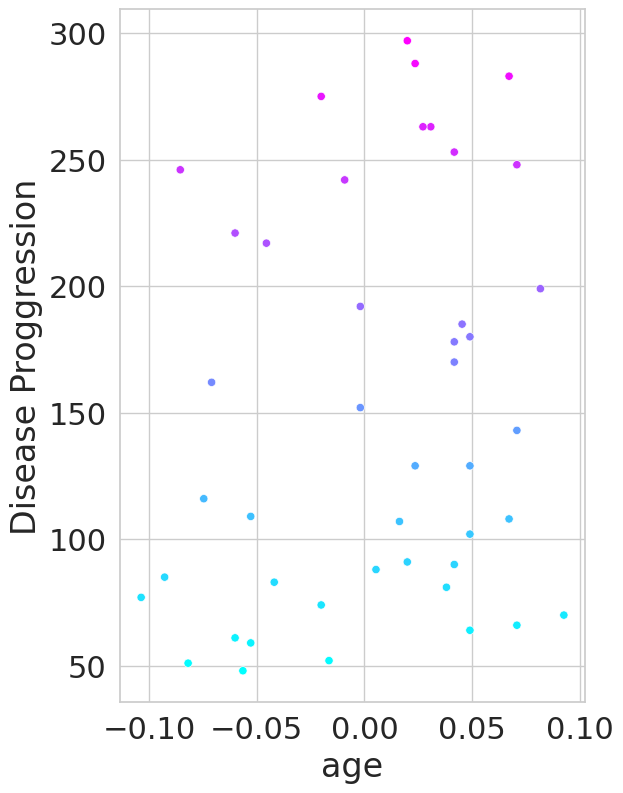

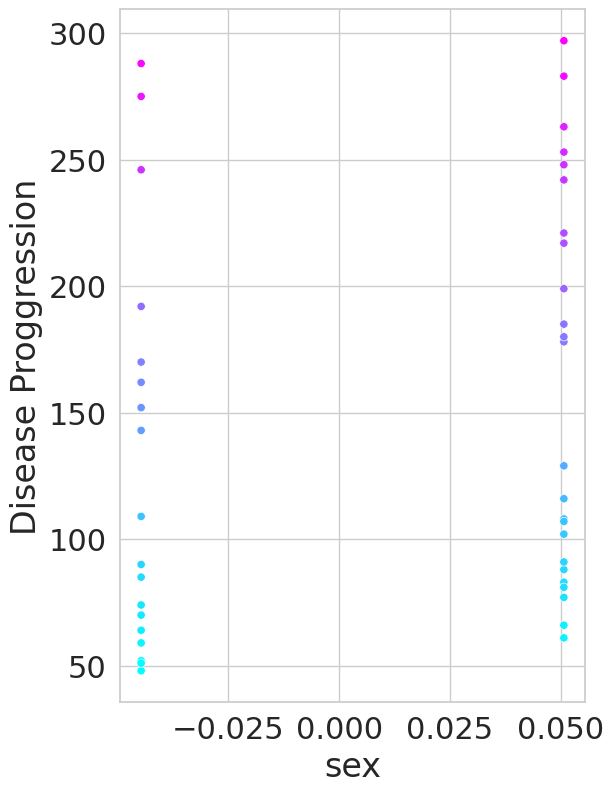

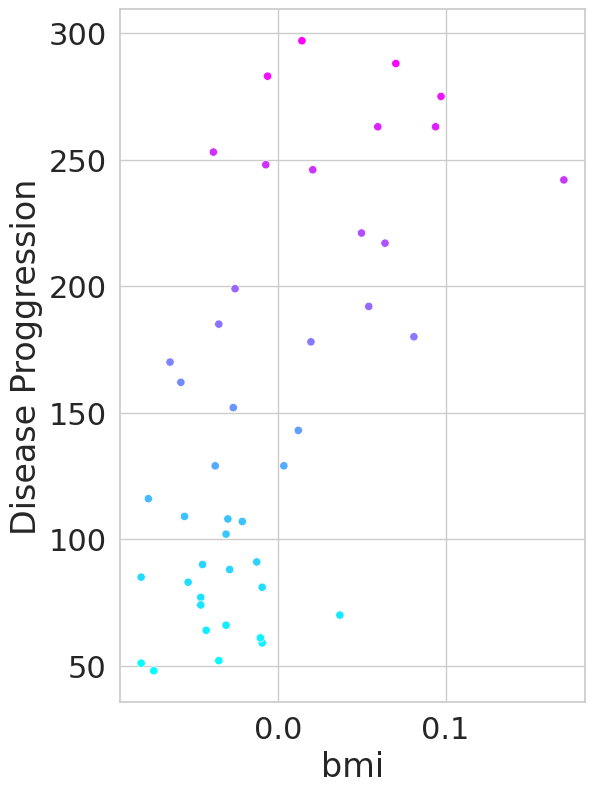

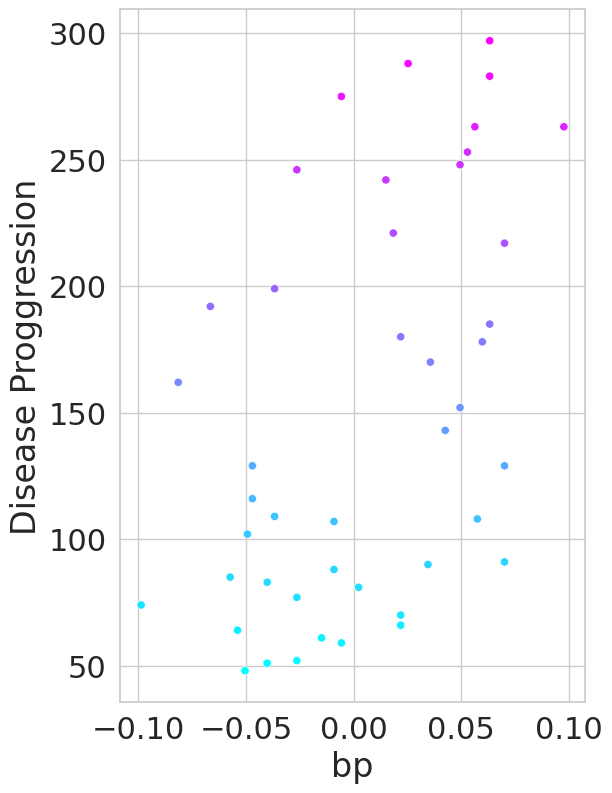

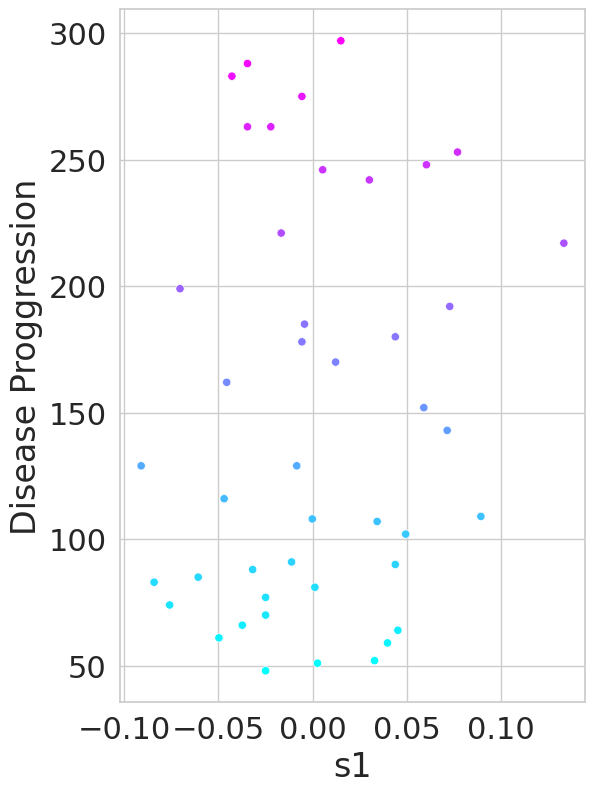

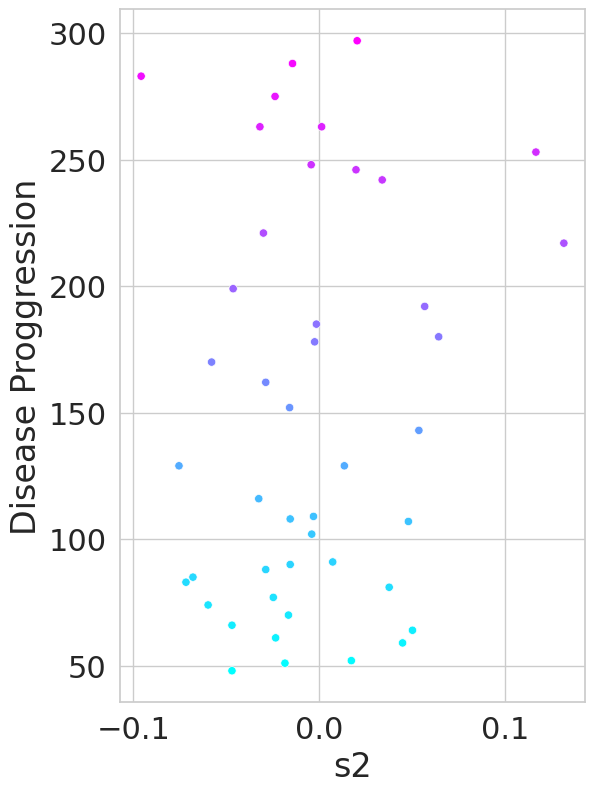

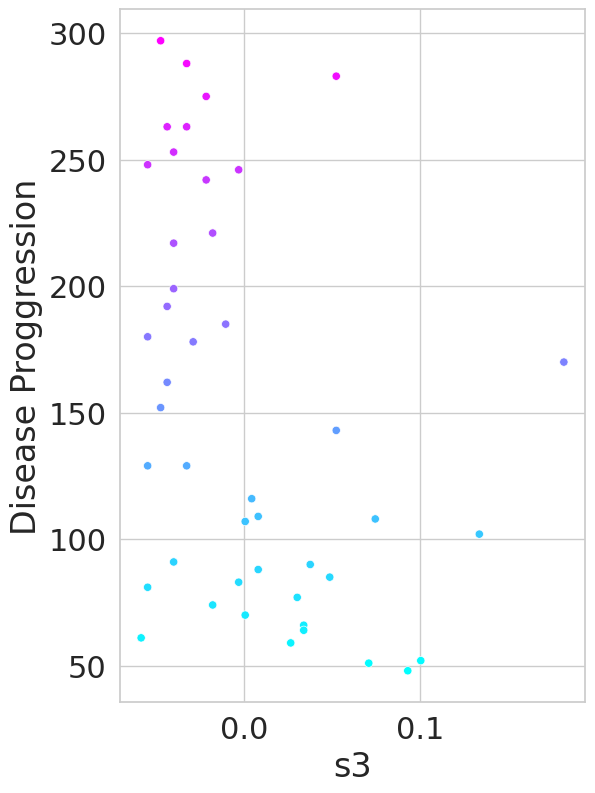

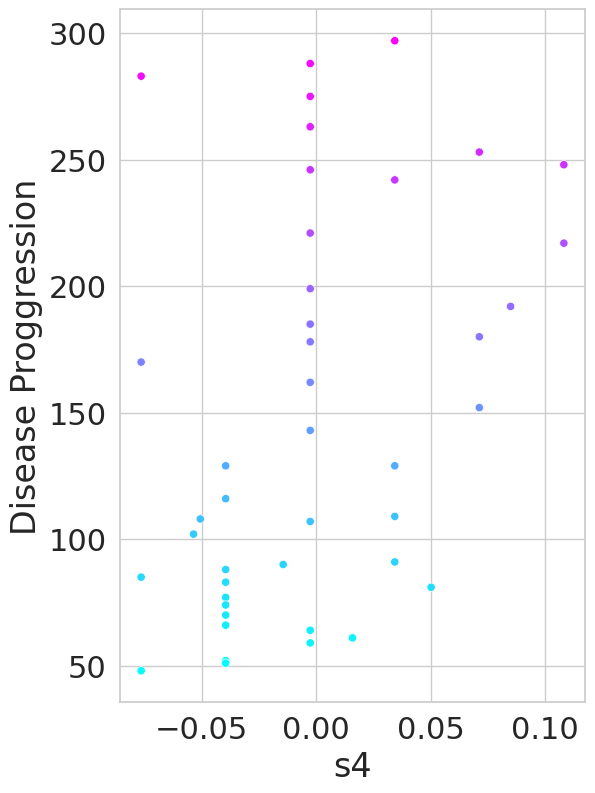

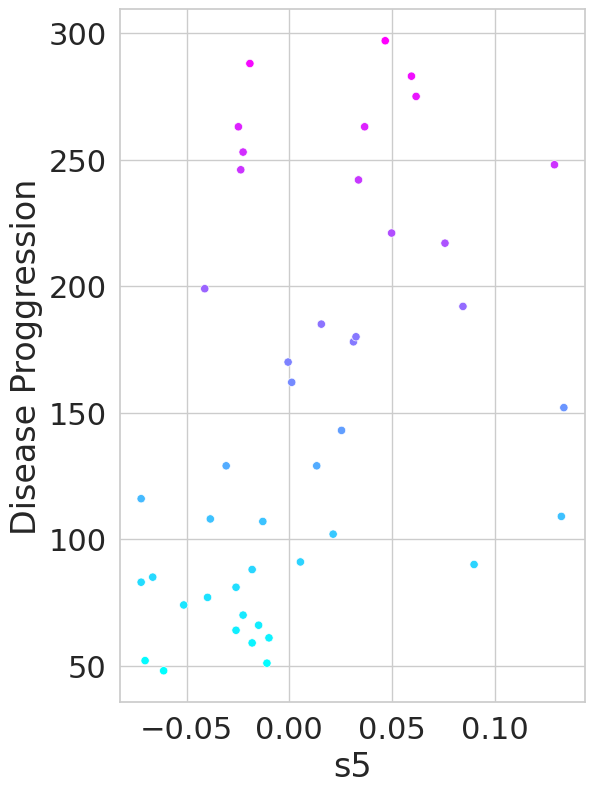

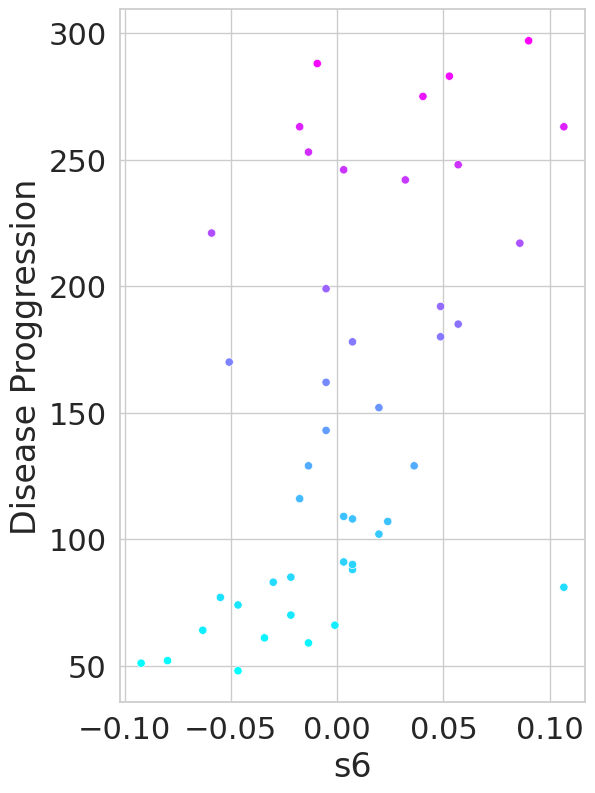

In [27]:
#Displaying each scatter plot
for feature in diabetes.feature_names:
  plt.figure(figsize=(6, 9))
  sns.scatterplot(data=sample_df, x=feature, y="Disease Proggression", hue="Disease Proggression", palette="cool", legend=False)

###Splitting the Data for Training and Testing

In [33]:
#Splitting the data for training and testing
from sklearn.model_selection import train_test_split
X_train, x_test, Y_train, y_test = train_test_split(diabetes.data, diabetes.target, random_state=11)

print(X_train.shape)
print(x_test.shape)

(331, 10)
(111, 10)


###Training the Model

In [35]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=Y_train)

LinearRegression()